### NYC Parking Tickets

NYC, with a population of 8.5 million and 61.8 million visitors in the year of 2017 had whooping number of vehicle violation tickets issued. I have used the data for the tickets issued in the fiscal year 2017 from [Kaggle.](https://www.kaggle.com/new-york-city/nyc-parking-tickets) There are different csv for each fiscal year and can be used from the link. <br>

I have used [information from NYC site](https://data.ny.gov/api/assets/83055271-29A6-4ED4-9374-E159F30DB5AE) to understand the terms used in the dataset.<br><br>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
data_2017 = pd.read_csv('2016-2017.csv')

C:\Users\Baby Panda\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Tickets collected in each fiscal year
print ("Tickets issued by NYC in fiscal year 2017: ",(data_2017['Summons Number'].count()) )

Tickets issued by NYC in fiscal year 2017:  10803028


<br>
### The number of tickets issued in fiscal year 2017 is more than 10 million !
<br><br>

In [4]:
data_2017.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,...,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,...,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,...,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


<br>Selecting features for analysis and creating a dataframe<br>

In [5]:
#Selecting features for analysis
dataset = data_2017[['Summons Number', 'Registration State', 'Plate ID', 'Issue Date','Violation Code', 'Vehicle Body Type', 
                     'Vehicle Make',
                      'Violation County']]

In [6]:
#The number of unique values in Registration State
state = pd.value_counts(dataset['Registration State'])
unique_state = pd.Series({'Number of unique values in Registration State': len(state)})

print(unique_state)

Number of unique values in Registration State    67
dtype: int64


<br>The number of unique values for registration state is found to be 67, whereas United States has only 50 states. There is some discripency in the data or we can also consider that there are vehicles from other countries driving around in the city. <br><br>

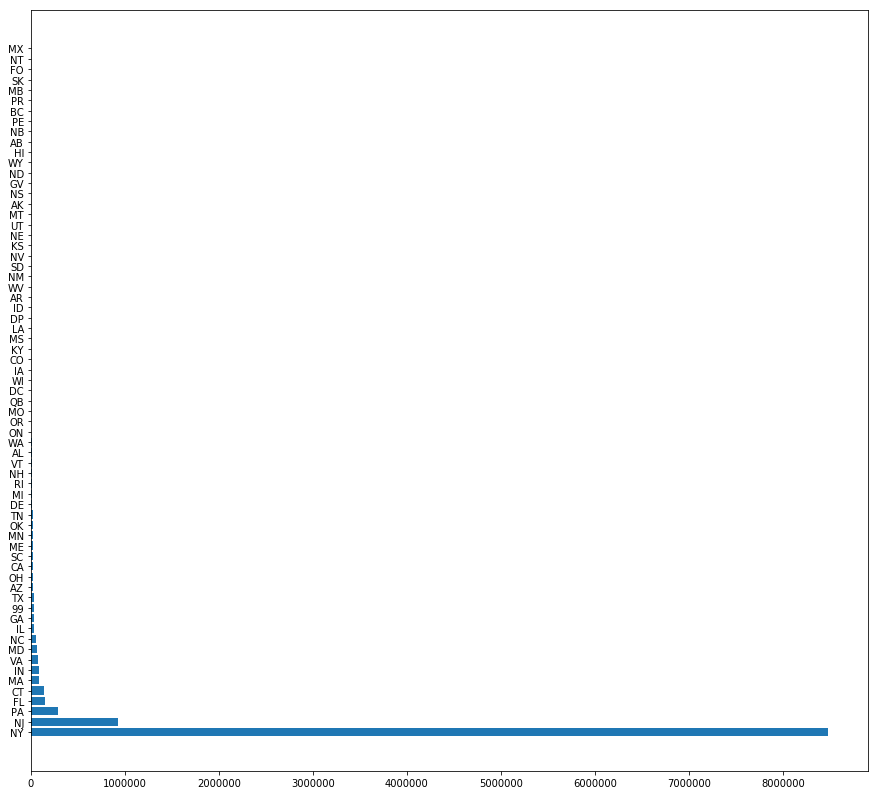

In [7]:
xbar = dataset['Registration State'].value_counts().index
heights = dataset['Registration State'].value_counts()
ybar = np.arange(len(xbar))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(ybar, heights)
 
# Create names on the y-axis
plt.yticks(ybar, xbar)
 
# Show graphic
plt.show()

<br><br>The number plates registered with NY has obtained the most violation ticket followed by New Jersy, Pennsylvania, Florida and Connecticut.<br><br>

In [8]:
#I will for now focus on the tickets to cars registered with state of New York

dataset = dataset[dataset['Registration State'] == 'NY']

In [9]:
#Modifying the issue date, extracting the issue month
dataset['Date'] = pd.to_datetime(dataset['Issue Date']) # Convert date to datetime
dataset['Issue Month'] = dataset['Date'].dt.month #extract month from Issue Date

In [10]:
dataset.head()

,Summons Number,Registration State,Plate ID,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation County,Date,Issue Month
0,5092469481,NY,GZH7067,07/10/2016,7,SUBN,TOYOT,BX,2016-07-10,7
1,5092451658,NY,GZH7067,07/08/2016,7,SUBN,TOYOT,BX,2016-07-08,7
2,4006265037,NY,FZX9232,08/23/2016,5,SUBN,FORD,BX,2016-08-23,8
3,8478629828,NY,66623ME,06/14/2017,47,REFG,MITSU,NY,2017-06-14,6
4,7868300310,NY,37033JV,11/21/2016,69,DELV,INTER,NY,2016-11-21,11


### Analyzing which county has the most and least violation 

New York City has five boroughs relating to five counties of the NYC. The borough and counties are as follows:
1. Manhattan - New York County
2. Bronx - Bronx County
3. Brooklyn - Kings County
4. Queens - Queens County
5. Staten Island - Richmond County



In [11]:
violation_county = dataset

In [12]:
violation_county['Violation County'].unique()

array(['BX', 'NY', 'QN', 'Q', 'K', 'R', 'ST', 'MN', 'BK', nan, 'BRONX',
       'QNS', 'KINGS'], dtype=object)

<br>We can see the values in Violation county has been interchangably used with the name of the boroughs and some of the values are null.<br>

For our convinience of understanding, I will change the varied names to the respective borough names and delete the null values. We can also replace the null value with the median value but here, I have decided to just drop them instead of replacing them.<br>

In [13]:
violation_county['Violation County'] = violation_county['Violation County'].replace(['BX'], 'BRONX')
violation_county['Violation County'] = violation_county['Violation County'].replace(['NY', 'MN'], 'MANHATTAN')
violation_county['Violation County'] = violation_county['Violation County'].replace(['Q', 'QN', 'QNS'], 'QUEENS')
violation_county['Violation County'] = violation_county['Violation County'].replace(['K', 'KINGS', 'BK'], 'BROOKLYN')
violation_county['Violation County'] = violation_county['Violation County'].replace(['ST', 'R'], 'STATEN ISLAND')

In [14]:
violation_county=violation_county.dropna()
violation_county.head()

,Summons Number,Registration State,Plate ID,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation County,Date,Issue Month
0,5092469481,NY,GZH7067,07/10/2016,7,SUBN,TOYOT,BRONX,2016-07-10,7
1,5092451658,NY,GZH7067,07/08/2016,7,SUBN,TOYOT,BRONX,2016-07-08,7
2,4006265037,NY,FZX9232,08/23/2016,5,SUBN,FORD,BRONX,2016-08-23,8
3,8478629828,NY,66623ME,06/14/2017,47,REFG,MITSU,MANHATTAN,2017-06-14,6
4,7868300310,NY,37033JV,11/21/2016,69,DELV,INTER,MANHATTAN,2016-11-21,11


In [15]:
violation_county = violation_county[['Violation County']]

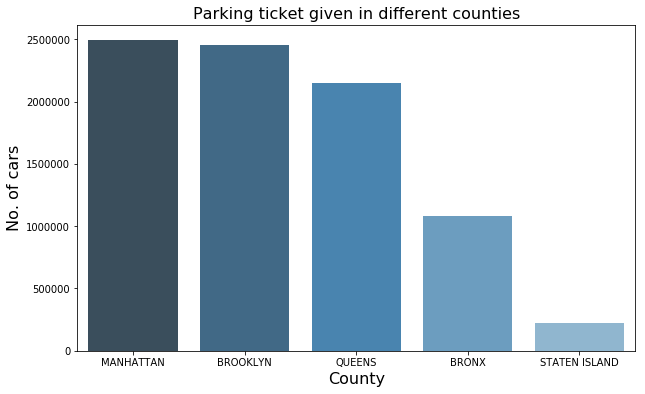

In [16]:
#plot the violation borough
violation_county = violation_county['Violation County'].value_counts()

plt.figure(figsize=(10,6))
f = sns.barplot(y=violation_county.values, x=violation_county.index, palette="Blues_d")
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);

<br><br>We can see Manhattan files the maximum number of parking tickets followed by Brooklyn. Staten Island observes the least number of parking tickets issued.<br><br>

### Analyzing on basis of months
There are time in a year when we see fewer cars on the road than normal. Is that really true in a city like NY?<br><br>

In [17]:
issue_month = dataset

In [18]:
issue_month = issue_month[['Issue Month']]

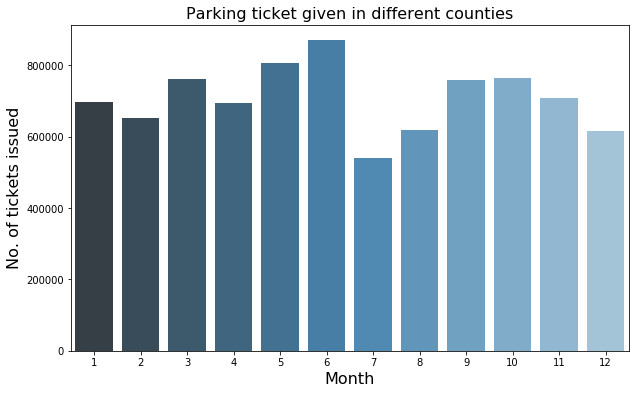

In [19]:
issue_month = issue_month['Issue Month'].value_counts()

plt.figure(figsize=(10,6))
issue = sns.barplot(y=issue_month.values, x=issue_month.index, palette="Blues_d")
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of tickets issued', fontsize=16);
plt.xlabel('Month', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);

Maximum tickets were issued in the month on June with the least in July

### Analyzing with respect to the violation code

There are codes given to every violation and on the basis of these violations a ticket is issued to the violator. We have a list of violation code with the description and will try to analyze which are the 10 most violations observed in the New York City.<br><br>
These codes can be found on [Violation code description](https://www1.nyc.gov/assets/finance_2016/downloads/pdf/translations/got_tickets_english.pdf)
<br><br>

In [20]:
violation_code = dataset

In [21]:
violation_code = violation_code[['Violation Code']]

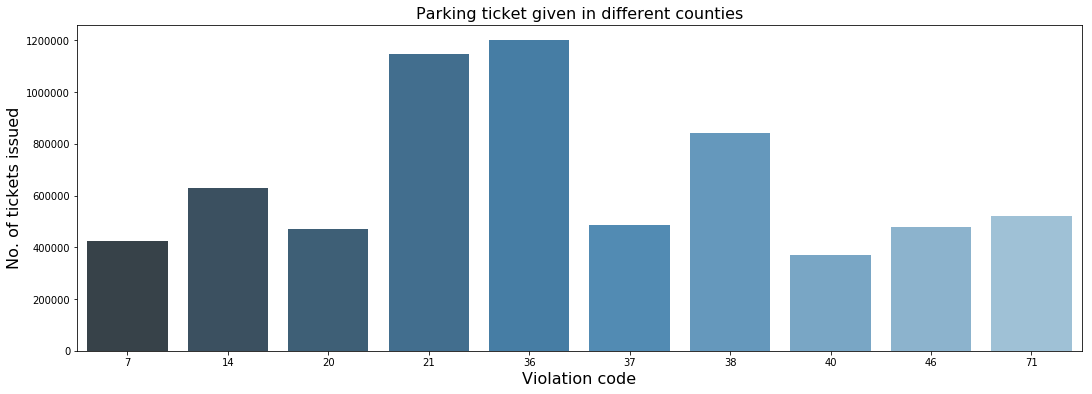

In [22]:
violation_code = violation_code['Violation Code'].value_counts().nlargest(10)

plt.figure(figsize=(18,6))
code = sns.barplot(y=violation_code.values, x=violation_code.index, palette="Blues_d")
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of tickets issued', fontsize=16);
plt.xlabel('Violation code', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);

Violation code description for the 10 most observed violation:

07 FAILURE TO STOP AT RED LIGHT  <br>
14  STANDING-DAY/TIME LIMITS- NO STD-LIMITS<br>
20 PARKING-DAY/TIME LIMITS    NO PRKG-LIMITS<br>
21 NO PARKING-STREET CLEANING    NO PKG-STR CLN<br>
36 PHTO SCHOOL ZN SPEED VIOLATIONSCHL ZN SPD VIO<br>
37 EXPIRED MUNI METER            EXPIRE MUNIMETE<br>
38 FAIL TO DSPLY MUNI METER RECPTFAIL DSPLY RECT<br>
40 FIRE HYDRANT                  <br>
46 DOUBLE PARKING                <br>
71 INSP. STICKER-EXPIRED/MISSING EXP/MSG INSP ST<br>

<br><br>
We can see Speed violation tickets have been issued the most. Followed by it are the tickets issued because of limited parking space available in the city. The government can build more parking garages. We can see one initiative made by the government to support the people by introducing payment of meters through apps. We can have many more initiatives like keeping a track of which meter spots are available and making some spot available for reservation with restrictions applied. <br><br>

## Can the same vehicle have more tickets issued and to which vehicle type does this vehicle belong?

In [23]:
plate = dataset

In [24]:
plate = plate[['Plate ID', 'Vehicle Body Type']]

In [25]:
plate =plate[['Plate ID', 'Vehicle Body Type']].groupby(['Plate ID', 'Vehicle Body Type']).size().nlargest(30)

In [26]:
plate

Plate ID  Vehicle Body Type
85848MD   VAN                  947
96087MA   VAN                  914
47603MD   DELV                 890
14828MJ   VAN                  867
30954JX   VAN                  831
14881MJ   VAN                  824
12359MG   VAN                  816
63521JM   VAN                  803
35253MB   DELV                 782
96089MA   VAN                  769
14829MJ   VAN                  766
49282KA   VAN                  765
77116MA   VAN                  756
85829JB   DELV                 739
37603JH   VAN                  733
85993MD   VAN                  728
12817KA   VAN                  727
52968MD   VAN                  716
47832MD   DELV                 715
49731MA   DELV                 709
12866KA   VAN                  708
28673MH   VAN                  708
97036JE   VAN                  704
91646MC   VAN                  699
52969MD   VAN                  692
49216KA   VAN                  688
16242TC   TRAC                 684
94905JA   DELV             

We observe that there are various vehicles which have at an average tickets issued more than two times in a day. These are mainly van truck or delivery truck. Both the vehicles come under the category used mainly for delivering or moving purposes. Having tickets issued more than twice in a day means they have been moving around very often and hence are owned by mailing agencies. Government can regulate these agencies and have a deal in order to control the number of violations. 

<br><br>
<b>Conclusion:</b>

There is no ending to violations but authorities can definitely strick a deal with the mailing and moving agencies to control the violation tickets issued. They also should plan on effective parking space availability at a reasonable cost specially in Manhattan and Brooklyn.<br>